In [56]:
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics.regression import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
from sklearn import metrics
from scipy.interpolate import interp2d


In [ ]:
import mplleaflet

In [111]:
def calc_dist(lat1, lon1, lat2, lon2):
    radius = 6371 # km

    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) \
        * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = radius * c
    return d

In [59]:
df_fine_complete = pd.read_csv('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/completed_fine_df2.csv')
df_fine_complete.head()

,Latitude,Longitude,city distances,elevation,Num solarfarms,DNR
0,31.75,-113.750000,246.198592,50.972839,0,6.03
1,31.75,-113.634615,239.573742,99.589859,0,6.03
2,31.75,-113.519231,233.261529,617.773071,1,6.03
3,31.75,-113.403846,227.288010,233.403931,0,6.03
4,31.75,-113.288461,221.680572,156.278107,0,6.03


In [113]:
forest = RandomForestRegressor(oob_score=True)
X = df_fine_complete[['Longitude','Latitude', 'DNR', 'elevation', 'city distances']]
y = df_fine_complete[['Longitude','Latitude','Num solarfarms']] #taking a random sample of 100 locations to match size of DNR data

In [114]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
# 75% training and 25% test

In [115]:
X_train.head()

,Longitude,Latitude,DNR,elevation,city distances
934,-112.134615,34.403846,7.11,1190.640991,103.296925
37,-109.480769,31.750000,6.97,1533.466309,151.082452
775,-112.019231,33.942308,6.83,1086.224487,52.499542
1107,-110.634615,34.865385,6.89,1629.112427,205.242754
1030,-110.288461,34.634615,6.67,1822.873291,211.045763


In [116]:
# Classifier on all training data!
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [117]:
y_pred = forest.predict(X_test)

In [118]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.8724708209090238

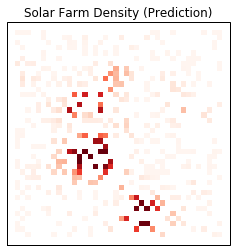

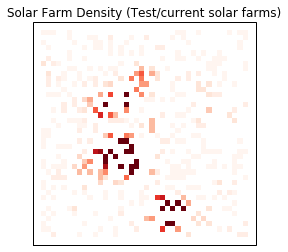

In [73]:
#Prediction
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# plot_arizona(ax4)
ax4.scatter(X_test['Longitude'], X_test['Latitude'], c=y_pred, alpha=1, marker='s', s=27,
           cmap='Reds', edgecolor='None')
ax4.set_title('Solar Farm Density (Prediction)')

#Test
fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# plot_arizona(ax4)
ax5.scatter(X_test['Longitude'], X_test['Latitude'], c=y_test['Num solarfarms'], alpha=1, marker='s', s=27,
           cmap='Reds', edgecolor='None')
ax5.set_title('Solar Farm Density (Test/current solar farms)')

In [59]:
fig4.savefig('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/static/pred_3.svg')
fig4.savefig('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/static/pred_3.jpg')
fig5.savefig('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/static/test_3.svg')
fig5.savefig('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/static/test_3.jpg')


C:\Users\cc831\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


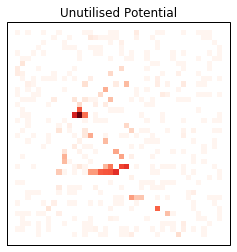

In [11]:
#Subtracting test (ie current locations) from predicted to find unutilised potential
potential = y_test['Num solarfarms'].as_matrix()-y_pred

fig6 = plt.figure()
ax6 = fig6.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax6.scatter(X_test['Longitude'], X_test['Latitude'], c=potential, alpha=1, marker='s', s=27,
           cmap='Reds', edgecolor='None', vmin=0, vmax=np.max(potential))
ax6.set_title('Unutilised Potential')

In [57]:
fig6.savefig('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/static/potential_solarfarms.svg')
fig6.savefig('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/static/potential_solarfarms.jpg')

In [87]:
current_data = {'Latitude':X_test['Latitude'], 'Longitude':X_test['Longitude'], 'current solarfarms':y_test['Num solarfarms']}
df_current = pd.DataFrame(current_data)

In [88]:
df_current.to_csv('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/current.csv', index=False)

In [75]:
potential_data = {'Latitude':X_test['Latitude'], 'Longitude':X_test['Longitude'], 'potential solarfarms':potential}
df_pot = pd.DataFrame(potential_data)

In [76]:
df_pot.to_csv('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/potential2.csv')

In [77]:
df_pot.head()

,Latitude,Longitude,potential solarfarms
380,32.788462,-111.442308,-1.7
151,32.096154,-110.173077,-0.8
41,31.865385,-113.634615,0.0
1493,36.019231,-112.250000,-3.4
1323,35.557692,-113.403846,0.8


In [89]:
df_current = pd.read_csv(r'C:\Users\cc831\OneDrive - University Of Cambridge\Documents\admin\Insightapplication\Project\Arizona\current.csv')
df_current.head()

,Latitude,Longitude,current solarfarms
0,32.788462,-111.442308,1
1,32.096154,-110.173077,3
2,31.865385,-113.634615,0
3,36.019231,-112.250000,0
4,35.557692,-113.403846,0


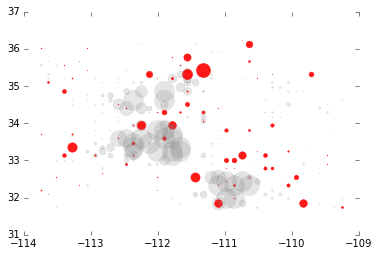

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

df_pot = pd.read_csv(r'C:\Users\cc831\OneDrive - University Of Cambridge\Documents\admin\Insightapplication\Project\Arizona\potential2.csv')
df_current = pd.read_csv(r'C:\Users\cc831\OneDrive - University Of Cambridge\Documents\admin\Insightapplication\Project\Arizona\current.csv')


fig1, ax1 = plt.subplots()
ax1.spines['right'].set_visible(False) #need to remove the black box surrounding figure
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


    
for i in range(len(df_current)):
    ax1.plot(df_current['Longitude'][i], df_current['Latitude'][i], '.', color='grey', ms=(df_current['current solarfarms'][i].clip(min=0))*3, alpha=0.2)
    ax1.plot(df_pot['Longitude'][i], df_pot['Latitude'][i], '.', color='r',  ms=(df_pot['potential solarfarms'][i].clip(min=0))*3, alpha=0.9)
    
mplleaflet.show(fig=fig1, path='C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/interactive/potential_current_solarfarms.html')

In [35]:
#tuning hyperparameters
forest.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
forest = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [38]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [39]:
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_split': [4, 6, 8, 10],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, X_test, y_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   26.5s finished


In [54]:
#rerunning random forest using the best parameters
best_random.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
y_pred2 = best_random.predict(X_test)
y_pred3 = best_grid.predict(X_test)

In [48]:
mse = metrics.mean_squared_error(y_test, y_pred2)
mse

0.6541101978321239